In [1]:
 %matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm

import seaborn as sns
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn import decomposition

In [2]:
# Crear nuestro datos Toy model

X1, Y1 = make_blobs(n_features = 10, n_samples=100, centers = 4, random_state=4, cluster_std=1)
print(X1.shape)
print(Y1.shape)

(100, 10)
(100,)


In [3]:
matrix = X1

In [4]:
# Crear un dataframe con las características
df = pd.DataFrame(matrix, index=range(matrix.shape[0]), columns=range(matrix.shape[1]) )
print(len(df.columns))

10


In [5]:
# Agregar el target
df['y'] = Y1
print(len(df.columns))

11


In [6]:
df.rename(columns={0:'x1',1:'x2',2:'x3',3:'x4',4:'x5',5:'x6',6:'x7',7:'x8',8:'x9',9:'x10'}, inplace=True)
print(df.columns)

Index([u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9', u'x10',
       u'y'],
      dtype='object')


<IPython.core.display.Javascript object>


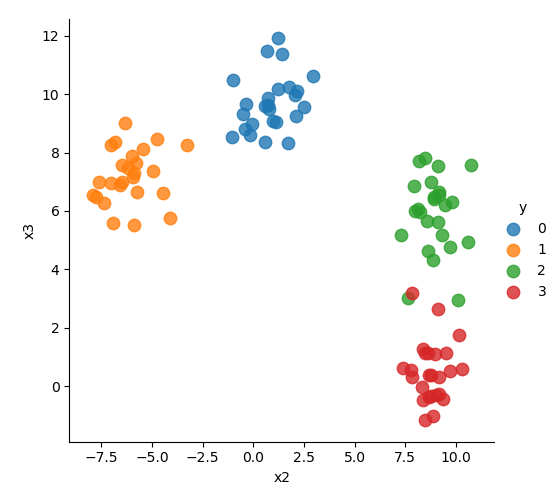

In [7]:
# Seleccionamos dos de las características.

sns.lmplot(x='x2', y='x3', data=df, fit_reg=False, hue='y', legend=True, scatter_kws={'s':80})

In [8]:
# Vamos a reducir la dimensionalidad del problema

pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X1)

In [9]:
df1 = pd.DataFrame( {'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4'] } )
print(df1)

    PC       var
0  PC1  0.445205
1  PC2  0.362620
2  PC3  0.169061
3  PC4  0.005475


<IPython.core.display.Javascript object>


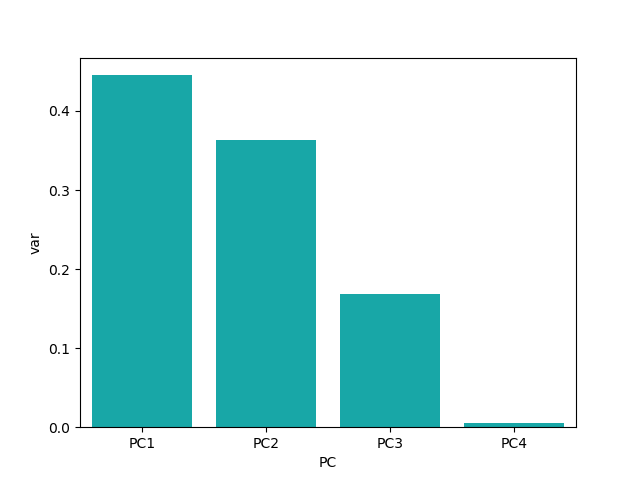

In [10]:
plt.figure()
sns.barplot(x='PC', y='var', data=df1, color='c')
plt.show()

In [11]:
pc_df = pd.DataFrame(data=pc, columns=['PC1','PC2','PC3','PC4'])
pc_df['Cluster'] = Y1

#print(pc_df)

<IPython.core.display.Javascript object>


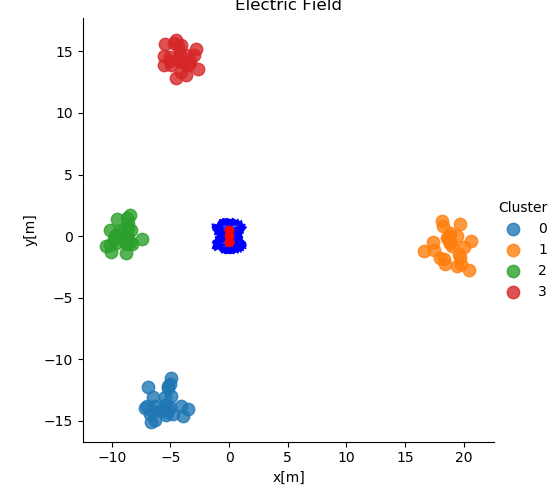

In [12]:
sns.lmplot(x='PC1', y='PC2', data=pc_df, fit_reg=False, hue='Cluster', legend=True, scatter_kws={'s':80})

# Modelamiento de sistemas lineales bajo superposición.

$$ \vec{E}(\vec{r}) = \frac{1}{4\pi \epsilon_{0}} \sum_{i = 1}^{n} \frac{q_{i}}{|\vec{r}-\vec{r}_{i}|^{3}} (\vec{r}-\vec{r}_{i})   $$ 

In [13]:
# Ajustando Constantes

k = 8.897*10**9
e = 1.602*10**-19
strength = k*e
print(strength)

1.4252994e-09


In [14]:
# Creando la Grilla // Discretizar el espacio

size = 1.
x = np.linspace(-size, size, 100)
y = np.linspace(-size, size, 100)

X,Y = np.meshgrid(x,y)

In [15]:
# Crear la ubicación de las fuentes de campo

def ChooseSource(G):
    X = []
    Y = []
    Z = []
    C = []
    
    if(G==1):
        X.append(0.)
        X.append(0.)
        Y.append(-0.2)
        Y.append(+0.2)
        C.append(-strength)
        C.append(+strength)
    elif(G==2):
        X.append(0.)
        X.append(0.)
        X.append(0.)
        Y.append(-0.5)
        Y.append(0.)
        Y.append(+0.5)
        C.append(-strength)
        C.append(+2*strength)
        C.append(-strength)
        
    return X,Y,C

In [16]:
Xsource, Ysource, Charge = ChooseSource(2)
print(Xsource)

[0.0, 0.0, 0.0]


In [24]:
# Definir las componentes de los campos

def XComponent(X, Y, X_source, Y_source, e=0.1):
     return (X - X_source)/( (X - X_source)**2 + (Y - Y_source)**2 + e)**1.5

def YComponent(X, Y, X_source, Y_source, e=0.1):
    return (Y - Y_source)/( (X - X_source)**2 + (Y - Y_source)**2 + e)**1.5  

In [25]:
# Llenar los campos vectoriales para cada una de las fuentes
U, V = 0,0

for i in range(len(Xsource)):
    U += Charge[i]*XComponent(X,Y,Xsource[i],Ysource[i])
    V += Charge[i]*YComponent(X,Y,Xsource[i],Ysource[i])

In [26]:
plt.streamplot(X,Y,U,V, density=2.0, color='b', linewidth=0.5, cmap='autumn' )
plt.title("Electric Field")
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.plot(Xsource, Ysource, 'ro')

In [27]:
# Vamos a calcular el heat-map de este campo
E=np.sqrt( U**2 + V**2 )/strength

<IPython.core.display.Javascript object>


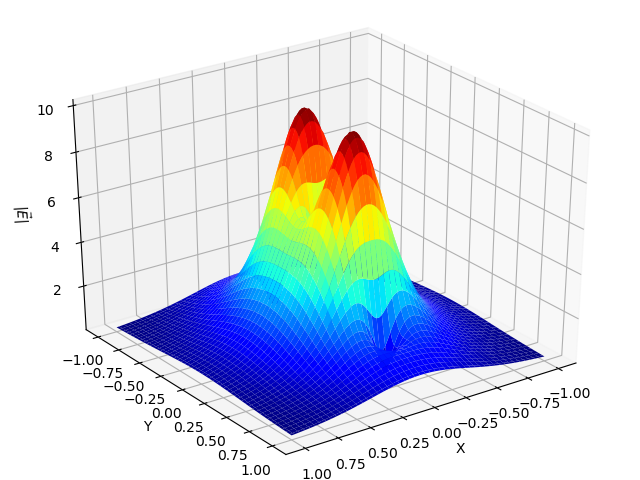

In [28]:
# Graficamos la curvas de magnitud

fig = plt.figure()
ax = Axes3D(fig, elev = 48, azim = 56)
ax.plot_surface(X,Y, E, cmap=cm.jet, linewidth=1.0)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel(r"$|\vec{E}|$")

#ax.set_zscale('log')

plt.savefig('HeatMap_ElectricField.pdf')